<a href="https://colab.research.google.com/github/Sean-Parkk/ML_with_python_study/blob/master/20200308.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치

In [1]:
pip install mglearn # scipy scikit-learn pillow

In [2]:
import sklearn
import scipy as sp
import mglearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.font_manager as fm
# 시각화 시 한글 폰트 나오도록
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


-----
-----

# 1. Forge 데이터셋

### 1-1. 데이터셋 생성 및 시각화

In [0]:
# forge 데이터셋 생성
X_forge, y_forge = mglearn.datasets.make_forge()

In [4]:
# (레코드, 피처) 수
X_forge.shape

(26, 2)

Text(0.5, 0, '첫 번째 특성')

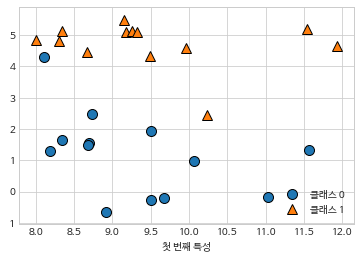

In [5]:
mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge)
plt.legend(['클래스 0', '클래스 1'], loc = 4)
plt.xlabel('첫 번째 특성')

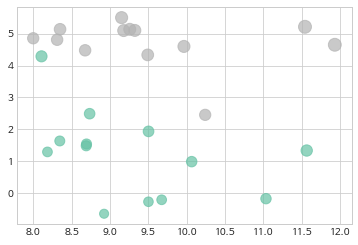

In [6]:
# 시각화 ver2
plt.scatter(X_forge[:, 0], X_forge[:, 1], s=X_forge[:,1]*10 + X_forge[:,0]*10, c=y_forge, cmap='Set2', alpha=.7)
plt.show()

### 1-2-1. kNN 알고리즘

* kNN알고리즘
    * 새로운 레코드에 대해 가장 가까운 훈련 데이터 포인트로 분류
    * 근접점의 수가 늘어나면, 가장 많이 근접한 이웃의 수로 분류

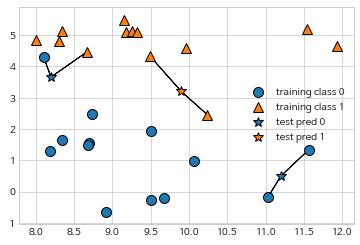

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [0]:
# 폴드아웃 샘플 생성
from sklearn.model_selection import train_test_split
X_forge, y_forge = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X_forge, y_forge, random_state=0)

In [0]:
# kNN분류 모듈 임포트, 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
# 분류 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
# predict 매서드로 테스트 데이터 호출하여 예측
print('테스트 세트 예측: {}'.format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [12]:
# 정확도 측정
print('테스트 세트 예측 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 예측 정확도: 0.86


### 1-2-2. kNeighborsClassifier 분석

* 이웃의 수에 따라 **결정 경계** *(decision boundary)*가 바뀜
* 이웃의 수를 늘릴수록 결정 경계는 부드러워짐
    * 이웃을 적게 사용하면 복잡도가 높아짐
    * 이웃을 많이 사용하면 복잡도가 낮아짐
    * 훈련 데이터 전체 개수를 이웃 수로 정하면, 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스로 예측
    

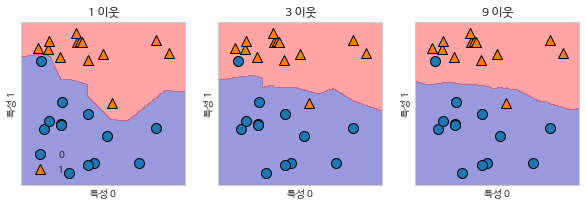

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_forge, y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)


-----
-----

# 2. wave 데이터셋

### 2-1. 데이터셋 생성 및 시각화

In [0]:
# 데이터셋 생성
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=40)

In [15]:
# (레코드, 피처) 수
X_wave.shape

(40, 1)

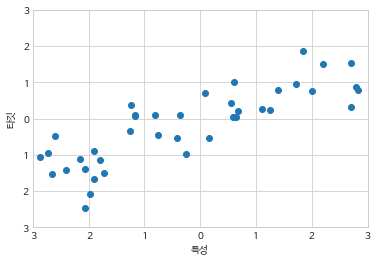

In [16]:
# 시각화
plt.scatter(X_wave, y_wave,  marker='o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')
plt.show()

# 2-2. k-최근접 이웃 회귀

* x축에 피처 위치, 그 중 가장 가까운 이웃으로 회귀
    * 하나의 이웃 사용 시, 가장 가까운 이웃 사용
    * 여러 개의 최근접 이웃 사용 시, 이웃 간 평균이 예측됨
    

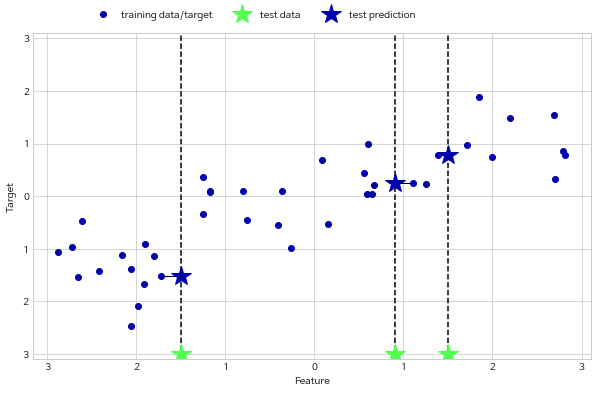

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

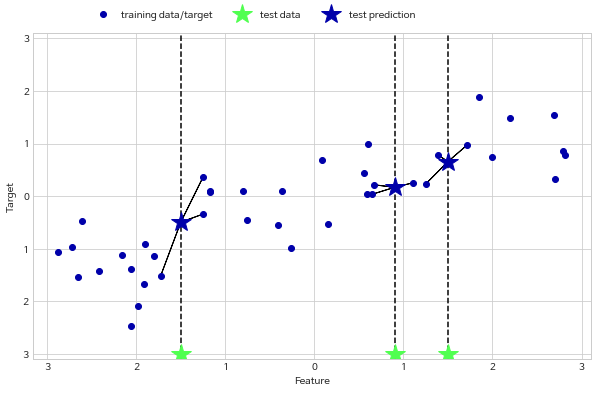

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [0]:
# 임포트 및 객체 불러오기
from sklearn.neighbors import KNeighborsRegressor
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=40)

In [44]:
# 폴드 아웃 샘플 생성
X_train, X_test, y_train, y_test = train_test_split(X_wave, y_wave, random_state=0)

# 이웃 수 3인 모델 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [45]:
# 테스트 세트 예측
print('테스트 세트 예측:\n{}'.format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [46]:
# 모델 테스트
print('테스트 세트 r스퀘어: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 r스퀘어: 0.83


* 이웃 수가 모델의 일반화에 크게 관여
    * 이웃이 적으면 훈련 데이터는 잘 예측, 일반화는 잘 안됨
    * 이웃이 많으면 훈련 데이터와는 잘 맞지 않을 수 있지만, 안정적인 예측 가능


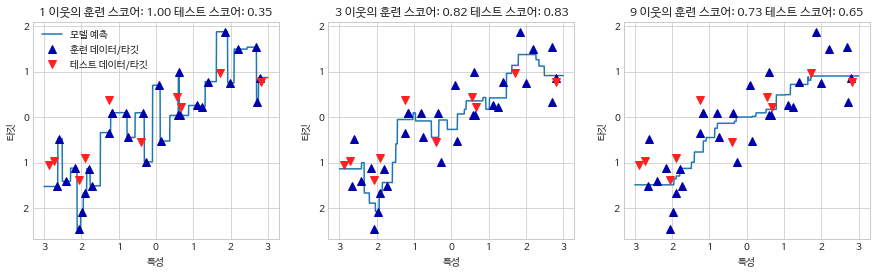

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title('{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc=2)

### 2-3 회귀 선형 모델

w[0]: 0.393906  b: -0.031804


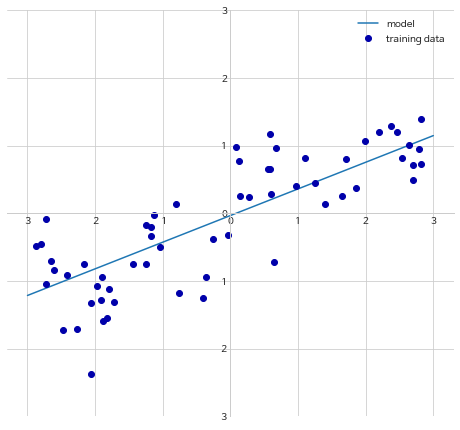

In [70]:
mglearn.plots.plot_linear_regression_wave()

In [0]:
# 객체 임포트 및 모델 생성
from sklearn.linear_model import LinearRegression
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X_wave, y_wave, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [81]:
# 모델의 w, b 출력
## 싸이킷런에서 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙임.
## 사용자가 지정한 매개변수와 구분하기 위함
print('[w(weight), 가중치, 계수]: {} \n[편향, 절편, 파라미터(b)]: {}'.format( lr.coef_,lr.intercept_))

[w(weight), 가중치, 계수]: [0.39390555] 
[편향, 절편, 파라미터(b)]: -0.031804343026759746


In [83]:
# 훈련 세트 점수 및 테스트 세트 점수 출력
## R스퀘어 값이 0.66으로 그리 좋은 점수는 아님
## 추가로, 훈련 세트와 테스트 세트 점수가 비슷
## 즉, 과소적합 상태
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


# 3. 위스콘신 유방암 데이터셋
* 조직 데이터를 기반으로 종양의 악성 여부 예측

### 3-1. 데이터셋 생성

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
# data 레코드, 피처 수 확인
cancer['data'].shape

(569, 30)

In [19]:
# target의 값 확인
np.unique(cancer['target'])

array([0, 1])

In [20]:
# 각 피처들의 이름 조회
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
# 클래스별 샘플 수
print('클래스별 샘플 수:\n{}'.format({n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}))

클래스별 샘플 수:
{'malignant': 212, 'benign': 357}


# 4. 보스턴 주택가격 데이터셋 
* 70년대 보스턴 주변 주택 평균 가격 예측
    * 범죄율, 찰스강 인접도, 고속도로 접근성 등을 활용
    * 회귀 분석



### 4-1. 데이터셋 생성
* 특성 공학
    * 기존 피처를 통해 새로운 피처 유도

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [23]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [24]:
# 레코드, 피처 수
boston['data'].shape

(506, 13)

In [0]:
# 특성 공학 데이터 로드 
X, y = mglearn.datasets.load_extended_boston()

In [84]:
# 레코드, 피처 수
X.shape

(506, 104)

### 4-2-1. 단순 선형 회귀

In [0]:
# 선형 회귀 모델 피팅
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [88]:
# 피처가 많은 데이터에 단순한 모델을 적용
## 훈련 세트에는 잘 적용되지만, 오버피팅 일어났음
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
훈련 세트 점수: 0.61


### 4-2-2. 릿지 회귀

* L2 규제
    * w의 값을 최소화

In [108]:
# 릿지 회귀 임포트 및 피팅
## 선형 회귀에 비해 과대적합이 적어짐
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [109]:
#ridge alpha값 조정
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [110]:
#ridge alpha값 조정
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
